In [1]:
import os

import torch

from MResNet import *
from MResNetC import *
from train import *

import seaborn as sns

sns.set()


"""
Code For 
Yiping Lu, Aoxiao Zhong, Quanzheng Li, Bin Dong. "Beyond Finite Layer Neural Network:Bridging Deep Architects and Numerical Differential Equations" 
Thirty-fifth International Conference on Machine Learning (ICML), 2018

@2prime @Aoxiao Zhong

Acknowledgement:
@pppppass(Zhihan Li)
"""
# %load_ext autoreload
# %autoreload 2
# os.environ["CUDA_VISIBLE_DEVICES"] = "0"

/home/nox/repos/beyond/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'\nCode For \nYiping Lu, Aoxiao Zhong, Quanzheng Li, Bin Dong. "Beyond Finite Layer Neural Network:Bridging Deep Architects and Numerical Differential Equations" \nThirty-fifth International Conference on Machine Learning (ICML), 2018\n\n@2prime @Aoxiao Zhong\n\nAcknowledgement:\n@pppppass(Zhihan Li)\n'

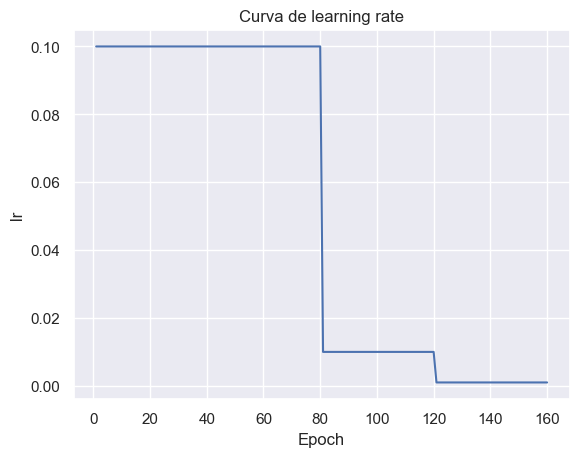

In [2]:
xs = [*range(1,161)]
ys = [lr_control({80: 0.1, 120: 0.01, 160: 0.001},x) for x in xs]

plt.figure()
plt.plot(xs, ys)
plt.title("Curva de learning rate")
plt.ylabel("lr")
plt.xlabel("Epoch")
plt.show()

# Experiments

## LMResNet-164

In [3]:
batch_size = 128
trainloader, testloader = get_cifar10(batch_size)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
from torchinfo import summary
from blocks import BasicBlock, Bottleneck
from MResNet import MResNet

In [5]:
net = MResNet(Bottleneck, [18,18,18], num_classes=10)#, stochastic_depth=False)
net.cuda()
model_name = "MResNet164"

from pathlib import Path

p = Path(f"{model_name}.txt")
if p.exists():
    p.unlink()

summary(
    net,
    input_size=(batch_size, 3, 32, 32),
    depth=5,
    col_names=[
        "input_size",
        "output_size",
        "num_params",
        "kernel_size",
        "mult_adds",
    ],
)

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Kernel Shape              Mult-Adds
MResNet                                  [128, 3, 32, 32]          [128, 10]                 86                        --                        --
├─Conv2d: 1-1                            [128, 3, 32, 32]          [128, 16, 32, 32]         432                       [3, 3]                    56,623,104
├─Downsample: 1-2                        [128, 16, 32, 32]         [128, 64, 32, 32]         --                        --                        --
│    └─Sequential: 2-1                   [128, 16, 32, 32]         [128, 64, 32, 32]         --                        --                        --
│    │    └─BatchNorm2d: 3-1             [128, 16, 32, 32]         [128, 16, 32, 32]         32                        --                        4,096
│    │    └─ReLU: 3-2                    [128, 16, 32, 32]         [128, 16, 32, 32]         -

In [6]:
%%time
sgd_para = {"lr": 1e-3, "weight_decay": 0.0001, "momentum": 0.9}
lr_dict = {80: 0.1, 120: 0.01, 160: 0.001}

# Trainer = NN_SGDTrainer(net,sgd_para, trainloader, testloader, {200:1e-3}, model_name + '.txt')
Trainer = NN_SGDTrainer(
    net,
    sgd_para,
    trainloader,
    testloader,
    lr_dict,
    model_name + ".txt",
)

for i in range(160):  # 100
    Trainer.train()

391it [01:13,  5.29it/s]

Epoch 1 finished, average loss: 0.0129839523
Starting testing


Correct: 5086, total: 10000, accuracy: 0.5085999966, average loss: 0.0107325727


391it [01:17,  5.07it/s]

Epoch 2 finished, average loss: 0.0086519868
Starting testing


Correct: 6360, total: 10000, accuracy: 0.6359999776, average loss: 0.0080450970


391it [01:22,  4.75it/s]

Epoch 3 finished, average loss: 0.0066264525
Starting testing


Correct: 7104, total: 10000, accuracy: 0.7103999853, average loss: 0.0065677942


391it [01:22,  4.76it/s]

Epoch 4 finished, average loss: 0.0054179202
Starting testing


Correct: 7476, total: 10000, accuracy: 0.7475999594, average loss: 0.0057181400


391it [01:21,  4.79it/s]

Epoch 5 finished, average loss: 0.0047873720
Starting testing


Correct: 7675, total: 10000, accuracy: 0.7674999833, average loss: 0.0052797431


391it [01:21,  4.80it/s]

Epoch 6 finished, average loss: 0.0042003195
Starting testing


Correct: 8112, total: 10000, accuracy: 0.8111999631, average loss: 0.0043370235


391it [01:21,  4.81it/s]

Epoch 7 finished, average loss: 0.0038260471
Starting testing


Correct: 7999, total: 10000, accuracy: 0.7998999953, average loss: 0.0046834884


391it [01:21,  4.82it/s]

Epoch 8 finished, average loss: 0.0035256502
Starting testing


Correct: 8372, total: 10000, accuracy: 0.8371999860, average loss: 0.0037546209


391it [01:21,  4.82it/s]

Epoch 9 finished, average loss: 0.0032749485
Starting testing


Correct: 7906, total: 10000, accuracy: 0.7906000018, average loss: 0.0050815871


391it [01:21,  4.82it/s]

Epoch 10 finished, average loss: 0.0030596664
Starting testing


Correct: 8402, total: 10000, accuracy: 0.8402000070, average loss: 0.0037487216


391it [01:21,  4.80it/s]

Epoch 11 finished, average loss: 0.0028652874
Starting testing


Correct: 8291, total: 10000, accuracy: 0.8290999532, average loss: 0.0039045587


391it [01:21,  4.82it/s]

Epoch 12 finished, average loss: 0.0027353028
Starting testing


Correct: 8524, total: 10000, accuracy: 0.8524000049, average loss: 0.0033528523


391it [01:21,  4.80it/s]

Epoch 13 finished, average loss: 0.0025905997
Starting testing


Correct: 8500, total: 10000, accuracy: 0.8499999642, average loss: 0.0035381817


391it [01:21,  4.82it/s]

Epoch 14 finished, average loss: 0.0024867718
Starting testing


Correct: 8600, total: 10000, accuracy: 0.8599999547, average loss: 0.0032512926


391it [01:21,  4.81it/s]

Epoch 15 finished, average loss: 0.0024076188
Starting testing


Correct: 8462, total: 10000, accuracy: 0.8461999893, average loss: 0.0035488876


391it [01:21,  4.82it/s]

Epoch 16 finished, average loss: 0.0023098846
Starting testing


Correct: 8597, total: 10000, accuracy: 0.8596999645, average loss: 0.0033983970


391it [01:21,  4.83it/s]

Epoch 17 finished, average loss: 0.0021786199
Starting testing


Correct: 8619, total: 10000, accuracy: 0.8618999720, average loss: 0.0033655583


391it [01:21,  4.82it/s]

Epoch 18 finished, average loss: 0.0021486592
Starting testing


Correct: 8615, total: 10000, accuracy: 0.8614999652, average loss: 0.0032668782


391it [01:20,  4.83it/s]

Epoch 19 finished, average loss: 0.0020881188
Starting testing


Correct: 8477, total: 10000, accuracy: 0.8476999998, average loss: 0.0036928423


391it [01:20,  4.83it/s]

Epoch 20 finished, average loss: 0.0020139565
Starting testing


Correct: 8606, total: 10000, accuracy: 0.8605999947, average loss: 0.0034054504


391it [01:21,  4.82it/s]

Epoch 21 finished, average loss: 0.0020011886
Starting testing


Correct: 8637, total: 10000, accuracy: 0.8636999726, average loss: 0.0031883015


391it [01:21,  4.81it/s]

Epoch 22 finished, average loss: 0.0019541723
Starting testing


Correct: 8493, total: 10000, accuracy: 0.8492999673, average loss: 0.0036112299


391it [01:21,  4.83it/s]

Epoch 23 finished, average loss: 0.0018926105
Starting testing


Correct: 8782, total: 10000, accuracy: 0.8781999946, average loss: 0.0029679055


391it [01:15,  5.17it/s]

Epoch 24 finished, average loss: 0.0018255071
Starting testing


Correct: 8693, total: 10000, accuracy: 0.8693000078, average loss: 0.0030524425


391it [01:17,  5.07it/s]

Epoch 25 finished, average loss: 0.0017911969
Starting testing


Correct: 8518, total: 10000, accuracy: 0.8517999649, average loss: 0.0036261470


391it [01:17,  5.02it/s]

Epoch 26 finished, average loss: 0.0017865879
Starting testing


Correct: 8555, total: 10000, accuracy: 0.8554999828, average loss: 0.0035140746


391it [01:17,  5.03it/s]

Epoch 27 finished, average loss: 0.0017266975
Starting testing


Correct: 8637, total: 10000, accuracy: 0.8636999726, average loss: 0.0032996187


391it [01:17,  5.04it/s]

Epoch 28 finished, average loss: 0.0017214822
Starting testing


Correct: 8728, total: 10000, accuracy: 0.8727999926, average loss: 0.0029907614


391it [01:17,  5.02it/s]

Epoch 29 finished, average loss: 0.0016993766
Starting testing


Correct: 8843, total: 10000, accuracy: 0.8842999935, average loss: 0.0026665203


391it [01:18,  5.01it/s]

Epoch 30 finished, average loss: 0.0016849738
Starting testing


Correct: 8748, total: 10000, accuracy: 0.8747999668, average loss: 0.0031505991


391it [01:17,  5.02it/s]

Epoch 31 finished, average loss: 0.0016564512
Starting testing


Correct: 8858, total: 10000, accuracy: 0.8858000040, average loss: 0.0027569962


391it [01:17,  5.01it/s]

Epoch 32 finished, average loss: 0.0016274824
Starting testing


Correct: 8708, total: 10000, accuracy: 0.8707999587, average loss: 0.0032271565


391it [01:17,  5.05it/s]


Epoch 33 finished, average loss: 0.0015759656
Starting testing
Correct: 8829, total: 10000, accuracy: 0.8828999996, average loss: 0.0028543029


391it [01:17,  5.07it/s]

Epoch 34 finished, average loss: 0.0015865323
Starting testing


Correct: 8865, total: 10000, accuracy: 0.8865000010, average loss: 0.0026873798


391it [01:17,  5.07it/s]

Epoch 35 finished, average loss: 0.0015425431
Starting testing


Correct: 8855, total: 10000, accuracy: 0.8854999542, average loss: 0.0028364679


391it [01:17,  5.05it/s]

Epoch 36 finished, average loss: 0.0015380226
Starting testing


Correct: 8608, total: 10000, accuracy: 0.8607999682, average loss: 0.0032963000


391it [01:18,  5.00it/s]

Epoch 37 finished, average loss: 0.0015326887
Starting testing


Correct: 8910, total: 10000, accuracy: 0.8909999728, average loss: 0.0025191654


391it [01:18,  4.99it/s]

Epoch 38 finished, average loss: 0.0014920361
Starting testing


Correct: 8711, total: 10000, accuracy: 0.8710999489, average loss: 0.0030958895


391it [01:17,  5.05it/s]

Epoch 39 finished, average loss: 0.0015057270
Starting testing


Correct: 8859, total: 10000, accuracy: 0.8858999610, average loss: 0.0028558713


391it [01:18,  5.00it/s]

Epoch 40 finished, average loss: 0.0014787170
Starting testing


Correct: 8717, total: 10000, accuracy: 0.8716999888, average loss: 0.0033695039


391it [01:18,  4.98it/s]

Epoch 41 finished, average loss: 0.0014744337
Starting testing


Correct: 8771, total: 10000, accuracy: 0.8770999908, average loss: 0.0031464282


391it [01:17,  5.03it/s]

Epoch 42 finished, average loss: 0.0014613916
Starting testing


Correct: 8903, total: 10000, accuracy: 0.8902999759, average loss: 0.0026546610


391it [01:17,  5.03it/s]

Epoch 43 finished, average loss: 0.0013951036
Starting testing


Correct: 8816, total: 10000, accuracy: 0.8815999627, average loss: 0.0029532984


391it [01:15,  5.18it/s]


Epoch 44 finished, average loss: 0.0014286725
Starting testing
Correct: 8899, total: 10000, accuracy: 0.8898999691, average loss: 0.0025836850


391it [01:14,  5.24it/s]


Epoch 45 finished, average loss: 0.0014056878
Starting testing
Correct: 8783, total: 10000, accuracy: 0.8782999516, average loss: 0.0032499781


391it [01:14,  5.24it/s]

Epoch 46 finished, average loss: 0.0013586966
Starting testing


Correct: 8894, total: 10000, accuracy: 0.8894000053, average loss: 0.0026759348


391it [01:18,  5.00it/s]

Epoch 47 finished, average loss: 0.0013981242
Starting testing


Correct: 8532, total: 10000, accuracy: 0.8531999588, average loss: 0.0039747626


391it [01:18,  4.96it/s]

Epoch 48 finished, average loss: 0.0014232316
Starting testing


Correct: 8843, total: 10000, accuracy: 0.8842999935, average loss: 0.0028995403


391it [01:18,  4.97it/s]

Epoch 49 finished, average loss: 0.0013944863
Starting testing


Correct: 8863, total: 10000, accuracy: 0.8862999678, average loss: 0.0028560299


391it [01:17,  5.04it/s]

Epoch 50 finished, average loss: 0.0013269916
Starting testing


Correct: 8865, total: 10000, accuracy: 0.8865000010, average loss: 0.0028808215


391it [01:17,  5.01it/s]

Epoch 51 finished, average loss: 0.0012935672
Starting testing


Correct: 8894, total: 10000, accuracy: 0.8894000053, average loss: 0.0028051851


391it [01:18,  4.97it/s]

Epoch 52 finished, average loss: 0.0013173410
Starting testing


Correct: 8724, total: 10000, accuracy: 0.8723999858, average loss: 0.0031676845


391it [01:17,  5.04it/s]

Epoch 53 finished, average loss: 0.0013013590
Starting testing


Correct: 8802, total: 10000, accuracy: 0.8801999688, average loss: 0.0030265716


391it [01:18,  5.00it/s]

Epoch 54 finished, average loss: 0.0013021522
Starting testing


Correct: 8811, total: 10000, accuracy: 0.8810999990, average loss: 0.0029386578


391it [01:19,  4.95it/s]

Epoch 55 finished, average loss: 0.0013161238
Starting testing


Correct: 8848, total: 10000, accuracy: 0.8847999573, average loss: 0.0027839374


391it [01:17,  5.04it/s]

Epoch 56 finished, average loss: 0.0012420014
Starting testing


Correct: 8915, total: 10000, accuracy: 0.8914999962, average loss: 0.0026608206


391it [01:17,  5.02it/s]

Epoch 57 finished, average loss: 0.0012908643
Starting testing


Correct: 9007, total: 10000, accuracy: 0.9006999731, average loss: 0.0024522456


391it [01:15,  5.17it/s]

Epoch 58 finished, average loss: 0.0012559797
Starting testing


Correct: 8903, total: 10000, accuracy: 0.8902999759, average loss: 0.0027267317


391it [01:12,  5.36it/s]

Epoch 59 finished, average loss: 0.0012345708
Starting testing


Correct: 8748, total: 10000, accuracy: 0.8747999668, average loss: 0.0034089311


391it [01:12,  5.37it/s]

Epoch 60 finished, average loss: 0.0012486234
Starting testing


Correct: 8928, total: 10000, accuracy: 0.8927999735, average loss: 0.0026145230


391it [01:12,  5.37it/s]

Epoch 61 finished, average loss: 0.0012146642
Starting testing


Correct: 8895, total: 10000, accuracy: 0.8894999623, average loss: 0.0028767438


391it [01:12,  5.36it/s]

Epoch 62 finished, average loss: 0.0012170405
Starting testing


Correct: 8952, total: 10000, accuracy: 0.8951999545, average loss: 0.0026846020


391it [01:11,  5.46it/s]

Epoch 63 finished, average loss: 0.0012367167
Starting testing


Correct: 8881, total: 10000, accuracy: 0.8880999684, average loss: 0.0028692119


391it [01:11,  5.46it/s]

Epoch 64 finished, average loss: 0.0012036955
Starting testing


Correct: 8946, total: 10000, accuracy: 0.8945999742, average loss: 0.0025325729


391it [01:11,  5.47it/s]

Epoch 65 finished, average loss: 0.0011879815
Starting testing


Correct: 8695, total: 10000, accuracy: 0.8694999814, average loss: 0.0033110257


391it [01:11,  5.46it/s]

Epoch 66 finished, average loss: 0.0011928423
Starting testing


Correct: 8702, total: 10000, accuracy: 0.8701999784, average loss: 0.0032982008


391it [01:11,  5.47it/s]

Epoch 67 finished, average loss: 0.0011589850
Starting testing


Correct: 8945, total: 10000, accuracy: 0.8944999576, average loss: 0.0026689270


391it [01:11,  5.47it/s]

Epoch 68 finished, average loss: 0.0011608869
Starting testing


Correct: 8880, total: 10000, accuracy: 0.8879999518, average loss: 0.0028117197


391it [01:11,  5.47it/s]

Epoch 69 finished, average loss: 0.0011622288
Starting testing


Correct: 8939, total: 10000, accuracy: 0.8938999772, average loss: 0.0025383871


391it [01:11,  5.47it/s]

Epoch 70 finished, average loss: 0.0011825027
Starting testing


Correct: 8883, total: 10000, accuracy: 0.8883000016, average loss: 0.0028829236


391it [01:11,  5.49it/s]

Epoch 71 finished, average loss: 0.0011561237
Starting testing


Correct: 8989, total: 10000, accuracy: 0.8988999724, average loss: 0.0024859601


391it [01:11,  5.49it/s]

Epoch 72 finished, average loss: 0.0011472769
Starting testing


Correct: 8734, total: 10000, accuracy: 0.8733999729, average loss: 0.0035060293


391it [01:11,  5.49it/s]

Epoch 73 finished, average loss: 0.0011732869
Starting testing


Correct: 8994, total: 10000, accuracy: 0.8993999958, average loss: 0.0025375353


391it [01:13,  5.32it/s]

Epoch 74 finished, average loss: 0.0011415848
Starting testing


Correct: 8705, total: 10000, accuracy: 0.8704999685, average loss: 0.0033378275


391it [01:15,  5.19it/s]

Epoch 75 finished, average loss: 0.0011091930
Starting testing


Correct: 8968, total: 10000, accuracy: 0.8967999816, average loss: 0.0027517988


391it [01:15,  5.18it/s]

Epoch 76 finished, average loss: 0.0011366996
Starting testing


Correct: 8833, total: 10000, accuracy: 0.8833000064, average loss: 0.0029738961


391it [01:15,  5.17it/s]

Epoch 77 finished, average loss: 0.0010804768
Starting testing


Correct: 8896, total: 10000, accuracy: 0.8895999789, average loss: 0.0027699664


391it [01:16,  5.12it/s]

Epoch 78 finished, average loss: 0.0011055951
Starting testing


Correct: 8920, total: 10000, accuracy: 0.8919999599, average loss: 0.0027013752


391it [01:16,  5.14it/s]

Epoch 79 finished, average loss: 0.0011035887
Starting testing


Correct: 9007, total: 10000, accuracy: 0.9006999731, average loss: 0.0024592260


391it [01:16,  5.13it/s]

Epoch 80 finished, average loss: 0.0011291989
Starting testing


Correct: 8964, total: 10000, accuracy: 0.8963999748, average loss: 0.0024196512


391it [01:16,  5.12it/s]

Epoch 81 finished, average loss: 0.0005021243
Starting testing


Correct: 9364, total: 10000, accuracy: 0.9363999963, average loss: 0.0015025161


391it [01:16,  5.14it/s]


Epoch 82 finished, average loss: 0.0003137878
Starting testing
Correct: 9400, total: 10000, accuracy: 0.9399999976, average loss: 0.0014755889


391it [01:16,  5.12it/s]

Epoch 83 finished, average loss: 0.0002539012
Starting testing


Correct: 9395, total: 10000, accuracy: 0.9394999743, average loss: 0.0014947116


391it [01:16,  5.13it/s]

Epoch 84 finished, average loss: 0.0002102187
Starting testing


Correct: 9411, total: 10000, accuracy: 0.9411000013, average loss: 0.0014899992


391it [01:16,  5.14it/s]


Epoch 85 finished, average loss: 0.0001806607
Starting testing
Correct: 9426, total: 10000, accuracy: 0.9425999522, average loss: 0.0014897994


391it [01:15,  5.15it/s]

Epoch 86 finished, average loss: 0.0001525925
Starting testing


Correct: 9429, total: 10000, accuracy: 0.9429000020, average loss: 0.0015228440


391it [01:16,  5.14it/s]

Epoch 87 finished, average loss: 0.0001357528
Starting testing


Correct: 9422, total: 10000, accuracy: 0.9422000051, average loss: 0.0015835376


391it [01:16,  5.14it/s]


Epoch 88 finished, average loss: 0.0001223973
Starting testing
Correct: 9438, total: 10000, accuracy: 0.9437999725, average loss: 0.0015589973


391it [01:16,  5.14it/s]

Epoch 89 finished, average loss: 0.0001138104
Starting testing


Correct: 9419, total: 10000, accuracy: 0.9418999553, average loss: 0.0015868507


391it [01:16,  5.14it/s]

Epoch 90 finished, average loss: 0.0000981169
Starting testing


Correct: 9432, total: 10000, accuracy: 0.9431999922, average loss: 0.0016309757


391it [01:15,  5.19it/s]

Epoch 91 finished, average loss: 0.0000922606
Starting testing


Correct: 9440, total: 10000, accuracy: 0.9440000057, average loss: 0.0016280885


391it [01:15,  5.15it/s]


Epoch 92 finished, average loss: 0.0000825179
Starting testing
Correct: 9422, total: 10000, accuracy: 0.9422000051, average loss: 0.0016592755


391it [01:15,  5.18it/s]

Epoch 93 finished, average loss: 0.0000833416
Starting testing


Correct: 9416, total: 10000, accuracy: 0.9415999651, average loss: 0.0017237718


391it [01:12,  5.41it/s]

Epoch 94 finished, average loss: 0.0000711884
Starting testing


Correct: 9420, total: 10000, accuracy: 0.9419999719, average loss: 0.0017218283


391it [01:12,  5.41it/s]

Epoch 95 finished, average loss: 0.0000698739
Starting testing


Correct: 9435, total: 10000, accuracy: 0.9434999824, average loss: 0.0017295347


391it [01:11,  5.45it/s]


Epoch 96 finished, average loss: 0.0000651566
Starting testing
Correct: 9432, total: 10000, accuracy: 0.9431999922, average loss: 0.0017542002


391it [01:11,  5.44it/s]


Epoch 97 finished, average loss: 0.0000641019
Starting testing
Correct: 9423, total: 10000, accuracy: 0.9422999620, average loss: 0.0018007690


391it [01:12,  5.43it/s]

Epoch 98 finished, average loss: 0.0000559879
Starting testing


Correct: 9436, total: 10000, accuracy: 0.9435999990, average loss: 0.0017429387


391it [01:17,  5.03it/s]

Epoch 99 finished, average loss: 0.0000555782
Starting testing


Correct: 9424, total: 10000, accuracy: 0.9423999786, average loss: 0.0017960480


391it [01:18,  4.98it/s]

Epoch 100 finished, average loss: 0.0000568718
Starting testing


Correct: 9440, total: 10000, accuracy: 0.9440000057, average loss: 0.0017740261


391it [01:18,  5.00it/s]

Epoch 101 finished, average loss: 0.0000441671
Starting testing


Correct: 9428, total: 10000, accuracy: 0.9427999854, average loss: 0.0017775020


391it [01:16,  5.10it/s]

Epoch 102 finished, average loss: 0.0000447919
Starting testing


Correct: 9430, total: 10000, accuracy: 0.9429999590, average loss: 0.0018262349


391it [01:11,  5.45it/s]


Epoch 103 finished, average loss: 0.0000489372
Starting testing
Correct: 9415, total: 10000, accuracy: 0.9414999485, average loss: 0.0018203244


391it [01:11,  5.44it/s]

Epoch 104 finished, average loss: 0.0000440578
Starting testing


Correct: 9447, total: 10000, accuracy: 0.9447000027, average loss: 0.0018108475


391it [01:12,  5.39it/s]

Epoch 105 finished, average loss: 0.0000471038
Starting testing


Correct: 9430, total: 10000, accuracy: 0.9429999590, average loss: 0.0018218398


391it [01:11,  5.45it/s]

Epoch 106 finished, average loss: 0.0000387168
Starting testing


Correct: 9427, total: 10000, accuracy: 0.9426999688, average loss: 0.0018167459


391it [01:11,  5.45it/s]

Epoch 107 finished, average loss: 0.0000385492
Starting testing


Correct: 9420, total: 10000, accuracy: 0.9419999719, average loss: 0.0018263799


391it [01:11,  5.46it/s]

Epoch 108 finished, average loss: 0.0000391923
Starting testing


Correct: 9443, total: 10000, accuracy: 0.9442999959, average loss: 0.0018468336


391it [01:11,  5.46it/s]

Epoch 109 finished, average loss: 0.0000388760
Starting testing


Correct: 9432, total: 10000, accuracy: 0.9431999922, average loss: 0.0018598410


391it [01:11,  5.44it/s]

Epoch 110 finished, average loss: 0.0000351106
Starting testing


Correct: 9428, total: 10000, accuracy: 0.9427999854, average loss: 0.0018703637


391it [01:11,  5.44it/s]

Epoch 111 finished, average loss: 0.0000360794
Starting testing


Correct: 9441, total: 10000, accuracy: 0.9440999627, average loss: 0.0018724292


391it [01:12,  5.40it/s]

Epoch 112 finished, average loss: 0.0000331376
Starting testing


Correct: 9419, total: 10000, accuracy: 0.9418999553, average loss: 0.0018648803


391it [01:12,  5.41it/s]

Epoch 113 finished, average loss: 0.0000348148
Starting testing


Correct: 9429, total: 10000, accuracy: 0.9429000020, average loss: 0.0018690604


391it [01:11,  5.45it/s]

Epoch 114 finished, average loss: 0.0000339428
Starting testing


Correct: 9446, total: 10000, accuracy: 0.9445999861, average loss: 0.0018516050


391it [01:11,  5.43it/s]

Epoch 115 finished, average loss: 0.0000297880
Starting testing


Correct: 9440, total: 10000, accuracy: 0.9440000057, average loss: 0.0018911301


391it [01:12,  5.40it/s]

Epoch 116 finished, average loss: 0.0000285826
Starting testing


Correct: 9440, total: 10000, accuracy: 0.9440000057, average loss: 0.0018951040


391it [01:12,  5.37it/s]

Epoch 117 finished, average loss: 0.0000259241
Starting testing


Correct: 9443, total: 10000, accuracy: 0.9442999959, average loss: 0.0018753052


391it [01:12,  5.36it/s]

Epoch 118 finished, average loss: 0.0000268685
Starting testing


Correct: 9449, total: 10000, accuracy: 0.9448999763, average loss: 0.0018725542


391it [01:12,  5.36it/s]

Epoch 119 finished, average loss: 0.0000267897
Starting testing


Correct: 9451, total: 10000, accuracy: 0.9450999498, average loss: 0.0019162060


391it [01:13,  5.35it/s]

Epoch 120 finished, average loss: 0.0000268295
Starting testing


Correct: 9434, total: 10000, accuracy: 0.9433999658, average loss: 0.0018934980


391it [01:13,  5.34it/s]

Epoch 121 finished, average loss: 0.0000251752
Starting testing


Correct: 9437, total: 10000, accuracy: 0.9436999559, average loss: 0.0019042453


391it [01:16,  5.09it/s]

Epoch 122 finished, average loss: 0.0000249632
Starting testing


Correct: 9433, total: 10000, accuracy: 0.9432999492, average loss: 0.0019040358


391it [01:15,  5.16it/s]

Epoch 123 finished, average loss: 0.0000221916
Starting testing


Correct: 9440, total: 10000, accuracy: 0.9440000057, average loss: 0.0019029523


391it [01:16,  5.12it/s]

Epoch 124 finished, average loss: 0.0000203619
Starting testing


Correct: 9440, total: 10000, accuracy: 0.9440000057, average loss: 0.0018889811


391it [01:14,  5.22it/s]


Epoch 125 finished, average loss: 0.0000207104
Starting testing
Correct: 9434, total: 10000, accuracy: 0.9433999658, average loss: 0.0018812227


391it [01:16,  5.09it/s]

Epoch 126 finished, average loss: 0.0000213887
Starting testing


Correct: 9439, total: 10000, accuracy: 0.9438999891, average loss: 0.0018685382


391it [01:13,  5.30it/s]

Epoch 127 finished, average loss: 0.0000191342
Starting testing


Correct: 9446, total: 10000, accuracy: 0.9445999861, average loss: 0.0018767551


391it [01:15,  5.16it/s]

Epoch 128 finished, average loss: 0.0000195634
Starting testing


Correct: 9446, total: 10000, accuracy: 0.9445999861, average loss: 0.0018935283


391it [01:16,  5.08it/s]

Epoch 129 finished, average loss: 0.0000216932
Starting testing


Correct: 9445, total: 10000, accuracy: 0.9444999695, average loss: 0.0019028910


391it [01:18,  4.99it/s]

Epoch 130 finished, average loss: 0.0000195488
Starting testing


Correct: 9441, total: 10000, accuracy: 0.9440999627, average loss: 0.0018967042


391it [01:17,  5.02it/s]

Epoch 131 finished, average loss: 0.0000211602
Starting testing


Correct: 9451, total: 10000, accuracy: 0.9450999498, average loss: 0.0018847242


391it [01:14,  5.23it/s]

Epoch 132 finished, average loss: 0.0000183947
Starting testing


Correct: 9433, total: 10000, accuracy: 0.9432999492, average loss: 0.0019022773


391it [01:11,  5.44it/s]

Epoch 133 finished, average loss: 0.0000201590
Starting testing


Correct: 9453, total: 10000, accuracy: 0.9452999830, average loss: 0.0018798122


391it [01:12,  5.36it/s]

Epoch 134 finished, average loss: 0.0000195735
Starting testing


Correct: 9447, total: 10000, accuracy: 0.9447000027, average loss: 0.0018857085


391it [01:16,  5.12it/s]

Epoch 135 finished, average loss: 0.0000196594
Starting testing


Correct: 9449, total: 10000, accuracy: 0.9448999763, average loss: 0.0018766784


391it [01:16,  5.10it/s]

Epoch 136 finished, average loss: 0.0000167715
Starting testing


Correct: 9438, total: 10000, accuracy: 0.9437999725, average loss: 0.0018825306


391it [01:16,  5.13it/s]

Epoch 137 finished, average loss: 0.0000168320
Starting testing


Correct: 9455, total: 10000, accuracy: 0.9454999566, average loss: 0.0018745502


391it [01:16,  5.12it/s]

Epoch 138 finished, average loss: 0.0000201321
Starting testing


Correct: 9438, total: 10000, accuracy: 0.9437999725, average loss: 0.0018920535


391it [01:15,  5.17it/s]

Epoch 139 finished, average loss: 0.0000190553
Starting testing


Correct: 9445, total: 10000, accuracy: 0.9444999695, average loss: 0.0018959400


391it [01:14,  5.24it/s]

Epoch 140 finished, average loss: 0.0000183302
Starting testing


Correct: 9450, total: 10000, accuracy: 0.9449999928, average loss: 0.0018916824


391it [01:13,  5.31it/s]

Epoch 141 finished, average loss: 0.0000177005
Starting testing


Correct: 9448, total: 10000, accuracy: 0.9447999597, average loss: 0.0018794006


391it [01:12,  5.39it/s]


Epoch 142 finished, average loss: 0.0000163155
Starting testing
Correct: 9446, total: 10000, accuracy: 0.9445999861, average loss: 0.0018756278


391it [01:13,  5.33it/s]

Epoch 143 finished, average loss: 0.0000177277
Starting testing


Correct: 9457, total: 10000, accuracy: 0.9456999898, average loss: 0.0018996758


391it [01:13,  5.29it/s]

Epoch 144 finished, average loss: 0.0000181573
Starting testing


Correct: 9446, total: 10000, accuracy: 0.9445999861, average loss: 0.0019220811


391it [01:14,  5.28it/s]


Epoch 145 finished, average loss: 0.0000178140
Starting testing
Correct: 9459, total: 10000, accuracy: 0.9458999634, average loss: 0.0018714790


391it [01:15,  5.16it/s]

Epoch 146 finished, average loss: 0.0000171695
Starting testing


Correct: 9456, total: 10000, accuracy: 0.9455999732, average loss: 0.0018841694


391it [01:13,  5.34it/s]


Epoch 147 finished, average loss: 0.0000156981
Starting testing
Correct: 9449, total: 10000, accuracy: 0.9448999763, average loss: 0.0018879700


391it [01:12,  5.41it/s]

Epoch 148 finished, average loss: 0.0000159867
Starting testing


Correct: 9444, total: 10000, accuracy: 0.9443999529, average loss: 0.0018984615


391it [01:13,  5.35it/s]

Epoch 149 finished, average loss: 0.0000159108
Starting testing


Correct: 9443, total: 10000, accuracy: 0.9442999959, average loss: 0.0018801097


391it [01:13,  5.32it/s]

Epoch 150 finished, average loss: 0.0000167476
Starting testing


Correct: 9453, total: 10000, accuracy: 0.9452999830, average loss: 0.0018738333


391it [01:12,  5.36it/s]

Epoch 151 finished, average loss: 0.0000158944
Starting testing


Correct: 9453, total: 10000, accuracy: 0.9452999830, average loss: 0.0018820339


391it [01:12,  5.42it/s]

Epoch 152 finished, average loss: 0.0000163151
Starting testing


Correct: 9450, total: 10000, accuracy: 0.9449999928, average loss: 0.0018964721


391it [01:12,  5.43it/s]

Epoch 153 finished, average loss: 0.0000155895
Starting testing


Correct: 9456, total: 10000, accuracy: 0.9455999732, average loss: 0.0019026865


391it [01:12,  5.41it/s]

Epoch 154 finished, average loss: 0.0000153540
Starting testing


Correct: 9454, total: 10000, accuracy: 0.9453999996, average loss: 0.0018930665


391it [01:12,  5.41it/s]

Epoch 155 finished, average loss: 0.0000162093
Starting testing


Correct: 9442, total: 10000, accuracy: 0.9441999793, average loss: 0.0019175996


391it [01:12,  5.42it/s]

Epoch 156 finished, average loss: 0.0000158241
Starting testing


Correct: 9444, total: 10000, accuracy: 0.9443999529, average loss: 0.0018911045


391it [01:12,  5.38it/s]

Epoch 157 finished, average loss: 0.0000148225
Starting testing


Correct: 9457, total: 10000, accuracy: 0.9456999898, average loss: 0.0019071615


391it [01:19,  4.92it/s]

Epoch 158 finished, average loss: 0.0000180162
Starting testing


Correct: 9447, total: 10000, accuracy: 0.9447000027, average loss: 0.0019131414


391it [01:17,  5.02it/s]

Epoch 159 finished, average loss: 0.0000153283
Starting testing


Correct: 9446, total: 10000, accuracy: 0.9445999861, average loss: 0.0019275785


391it [01:19,  4.93it/s]

Epoch 160 finished, average loss: 0.0000169703
Starting testing


Correct: 9447, total: 10000, accuracy: 0.9447000027, average loss: 0.0019011778
CPU times: user 2h 20min 20s, sys: 1h 11min 50s, total: 3h 32min 11s
Wall time: 3h 34min 19s


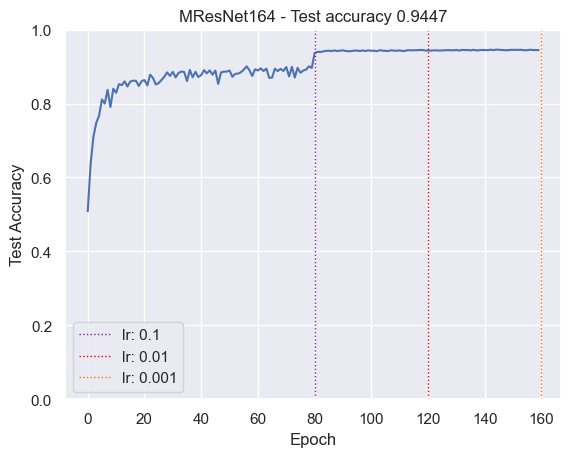

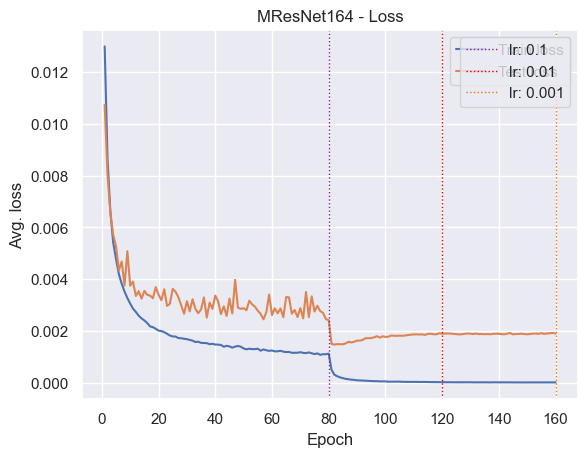

In [7]:
with open(p) as f:
    lines = f.read()

data = re.findall(
    r"Epoch (\d+) finished, average loss: (\d+\.\d+)\n[\d\- :\.]*\nStarting testing\n[\d\- :\.]*\nCorrect: \d+, total: \d+, accuracy: (\d+\.\d+), average loss: (\d+\.\d+)",
    lines,
    re.MULTILINE,
)
# print(len(data))
# print(data)
epochs = [int(x[0]) for x in data]
losses = [float(x[1]) for x in data]
accuracies = [float(x[2]) for x in data]
test_losses = [float(x[3]) for x in data]

results_mresnet164 = dict(epochs=epochs, losses=losses, accuracies=accuracies, test_losses=test_losses)

fix, ax = plt.subplots()
ax.plot(accuracies)
ax.set_ylim(0, 1)
plt.title(f"{model_name} - Test accuracy {accuracies[-1]:.4f}")
plt.ylabel("Test Accuracy")
plt.xlabel("Epoch")
# ax.yaxis.set_major_locator(MultipleLocator(0.05))
cmap = plt.get_cmap("Pastel1")

for color, (epoch, value) in zip(["xkcd:purple", "xkcd:red", "xkcd:orange"], lr_dict.items()):
    plt.axvline(x=epoch, label=f"lr: {value}", linestyle=":", linewidth=1, c=color)
    
plt.legend()
plt.show()

fix, ax = plt.subplots()
train_loss, = ax.plot(epochs, losses, label="Train loss")
test_loss, = ax.plot(epochs, test_losses, label="Test loss")
plt.title(f"{model_name} - Loss")
plt.ylabel("Avg. loss")
plt.xlabel("Epoch")
first_legend = plt.legend(handles=[train_loss, test_loss])

ax = plt.gca().add_artist(first_legend)

lrhs = []
for color, (epoch, value) in zip(["xkcd:purple", "xkcd:red", "xkcd:orange"], lr_dict.items()):
    lr_h = plt.axvline(x=epoch, label=f"lr: {value}", linestyle=":", linewidth=1, c=color)
    lrhs.append(lr_h)

plt.legend(handles=lrhs)
plt.show()

In [8]:
with open(f"{model_name}_ks.txt", "w") as f:
    for i, x in enumerate(net.ks, start=1):
        f.write(f"{i},{x.item()}\n") 